In [82]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
plt.rcParams.update({'font.size': 6})
# plt.rc('xlabel', fontsize=8) 
# plt.rc('ylabel', fontsize=8) 

from utils import *
phoebe_c = {'black': "#131313",
             'blue': "#2B71B1",
             'orange': "#FF702F",
             'green': "#22B77F",
             'red': '#F92E3D',
             'purple': '#6D2EB8',
             'pink': "#ED3170",
             'yellow': "#FFCD2F"}

import phoebe
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
phoebe.multiprocessing_on()
phoebe.mpi_off()
phoebe.devel_off()
%matplotlib inline

In [2]:
def get_current_values(b, twigs):
    current_values = {}
    for twig in twigs:
        current_values[twig] = b.get_value(twig)
    return current_values

In [3]:
b = phoebe.load('bundles/after_estimators_dtr.bundle')

In [4]:
b.add_server('remoteslurm', crimpl_name='terra',
             conda_env='phoebe_2.4',
             nprocs=96, install_deps=False, walltime=48,
             server='terra', overwrite=True)

<ParameterSet: 11 parameters | qualifiers: slurm_job_name, mail_user, walltime, mail_type, isolate_env, conda_env, use_conda, install_deps, crimpl_name, nprocs, use_mpi>

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


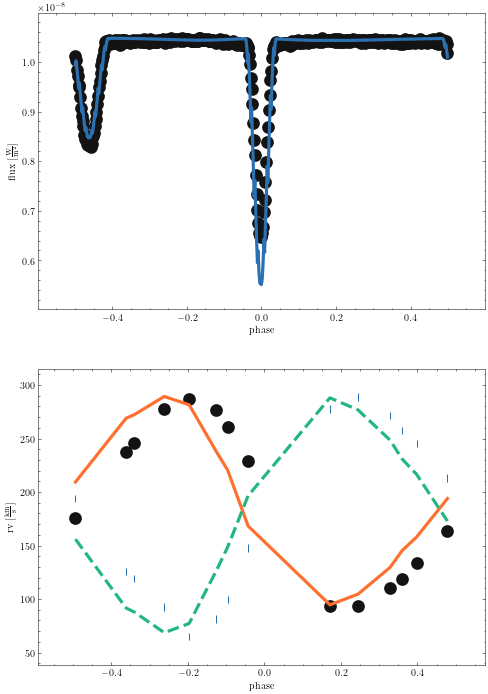

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [81]:
b.plot(x='phase', model='rvgeom_model', show=True)

# lc V: NM and DE

In [5]:
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, primary, binary>

### NM: all at once

In [6]:
b.add_solver('optimizer.nelder_mead', 
             solver='opt_nm_full',
             fit_parameters = ['incl@binary', 'teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw'],
             compute='phoebe01', overwrite=True)
b.set_value('maxiter', solver='opt_nm_full', value=1000)

In [7]:
# b.run_solver('opt_nm_full', solution='opt_nm_full_solution', use_server='terra', detach=True)

### DE

In [8]:
b.add_distribution('incl@binary', phoebe.uniform(80,90), distribution='de_bounds')
b.add_distribution('teffratio', phoebe.uniform(0.5,1.5), distribution='de_bounds')
b.add_distribution('requivratio', phoebe.uniform(0.1,1.5), distribution='de_bounds')
b.add_distribution('requivsumfrac', phoebe.uniform(0.01,0.5), distribution='de_bounds')
b.add_distribution('esinw', phoebe.uniform(-0.1,0.3), distribution='de_bounds')
b.add_distribution('ecosw', phoebe.uniform(-0.2,0.2), distribution='de_bounds')

<ParameterSet: 1 parameters>

In [9]:
b.add_solver('optimizer.differential_evolution', 
             solver='opt_de', bounds=['de_bounds',],
             fit_parameters = ['incl@binary','teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw'],
             compute='phoebe01', overwrite=True)

<ParameterSet: 15 parameters | qualifiers: polish, popsize, maxiter, tol, bounds, compute, comments, bounds_sigma, bounds_combine, strategy, expose_lnprobabilities, use_server, atol, recombination, fit_parameters>

In [10]:
b.set_value('maxiter', solver='opt_de', value=1000)
b.set_value('popsize', solver='opt_de', value=60)
b.set_value('polish', False)

In [11]:
# b.run_solver('opt_de', solution='opt_de_solution', use_server='terra', detach=True)

### NM: sequential

In [12]:
def optimize_params(b, fit_twigs, label, use_server='', plot=True):
    b.add_solver('optimizer.nelder_mead', solver='opt_%s' % label,
                    fit_parameters = fit_twigs, overwrite=True)
    b.set_value('maxiter', solver='opt_%s' % label, value=200)
    b.run_solver('opt_%s' % label, solution='opt_%s_sol' % label, use_server=use_server)
    b.adopt_solution('opt_%s_sol' % label)
    # b.run_checks()
    # b.run_delayed_constraints()
    b.run_compute(model='opt_%s_model' % label)
    if plot:
        b.plot(['dataset', 'opt_%s_model' % label], x='phase', show=True)
    return b

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.06.12-14.30.44/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.06.12-14.30.44/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.06.12-14.30.44"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_GOMKuLIKehFTKNKNlnhVntCSGQCncS.py terra:/home/users/angela/crimpl/crimpl-job-2022.06.12-14.30.44/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_GOMKuLIKehFTKNKNlnhVntCSGQCncS.py' >> /home/users/angela/crimpl/crimpl-job-2022.06.12-14.30.44/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 46.88it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


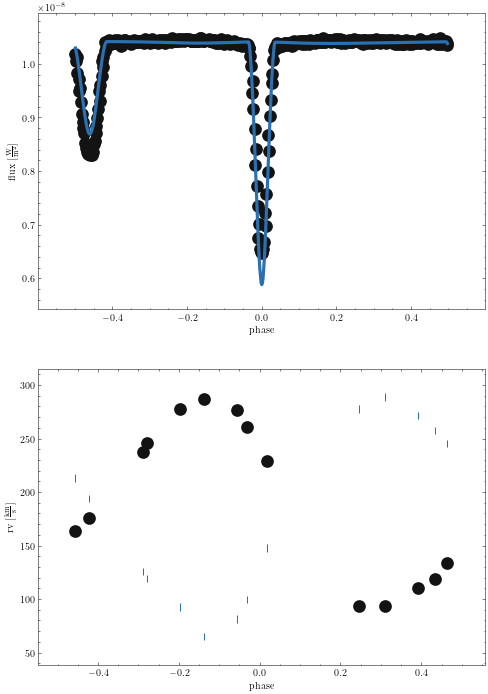

In [14]:
b = optimize_params(b, ['requivsumfrac','incl@binary'], 'rsumincl', use_server='terra', plot=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.06.12-15.22.30/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.06.12-15.22.30/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.06.12-15.22.30"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_QwtqqDcfgMaJIvmNpWGtYibvZOfRON.py terra:/home/users/angela/crimpl/crimpl-job-2022.06.12-15.22.30/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_QwtqqDcfgMaJIvmNpWGtYibvZOfRON.py' >> /home/users/angela/crimpl/crimpl-job-2022.06.12-15.22.30/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 46.92it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


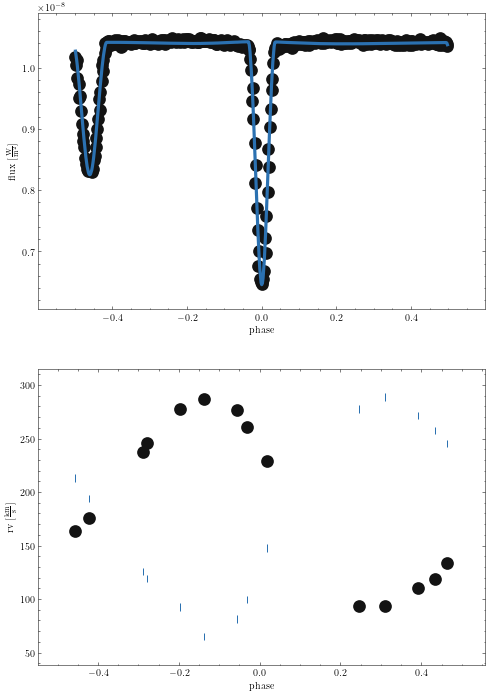

In [15]:
b = optimize_params(b, ['teffratio', 'esinw'], 'teffresw', use_server='terra', plot=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.06.12-15.45.31/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.06.12-15.45.31/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.06.12-15.45.31"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_qtluAHInxObpIyHsHAhZXCZUDJEICX.py terra:/home/users/angela/crimpl/crimpl-job-2022.06.12-15.45.31/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_qtluAHInxObpIyHsHAhZXCZUDJEICX.py' >> /home/users/angela/crimpl/crimpl-job-2022.06.12-15.45.31/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.05it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


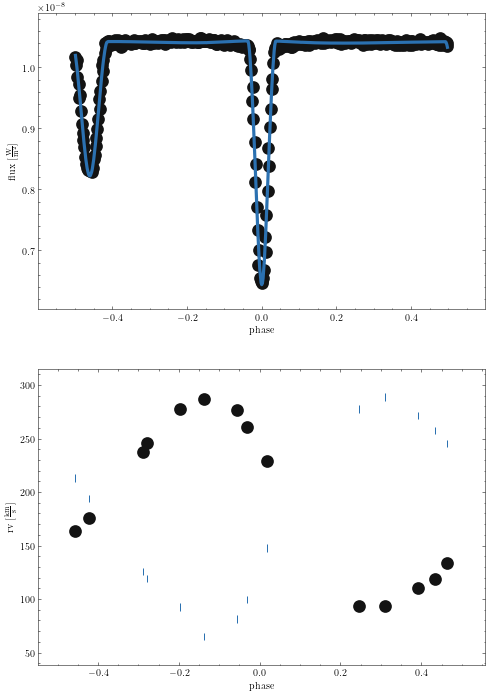

In [16]:
b = optimize_params(b, ['requivsumfrac', 'requivratio', 'teffratio'], 'rsumrrteffr',use_server='terra', plot=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.06.12-17.08.19/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.06.12-17.08.19/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.06.12-17.08.19"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_nQSztsniQopDyBIWKZNQFcTFgzuoLi.py terra:/home/users/angela/crimpl/crimpl-job-2022.06.12-17.08.19/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_nQSztsniQopDyBIWKZNQFcTFgzuoLi.py' >> /home/users/angela/crimpl/crimpl-job-2022.06.12-17.08.19/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.03it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


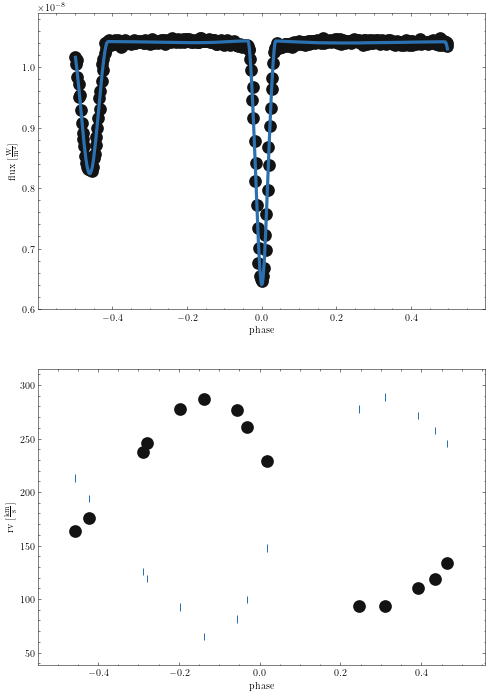

In [17]:
b = optimize_params(b, ['requivsumfrac', 'requivratio', 'teffratio', 'incl@binary', 'esinw', 'ecosw'], 'all', 
                    use_server='terra',  plot=True)

### Load all results

In [23]:
b = phoebe.load('bundles/after_optimizers_lc_dtr.bundle')

In [24]:
b.adopt_solution('opt_nm_full_solution')
b.run_compute(model='opt_nm_full_model', overwrite=True)
residuals_opt_nm_full = b.calculate_residuals(model='opt_nm_full_model', dataset='lc01')
opt_nm_full_results = get_current_values(b, twigs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [00:16<00:00, 27.47it/s]


In [25]:
b.adopt_solution('opt_all_sol')
b.run_compute(model='opt_all_model', overwrite=True)
residuals_opt_nm_seq = b.calculate_residuals(model='opt_all_model', dataset='lc01')
opt_nm_seq_results = get_current_values(b, twigs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [00:16<00:00, 27.57it/s]


In [26]:
b.adopt_solution('opt_de_solution')
b.run_compute(model='opt_de_model', overwrite=True)
residuals_opt_de = b.calculate_residuals(model='opt_de_model', dataset='lc01')
opt_de_results = get_current_values(b, twigs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [00:16<00:00, 27.17it/s]


In [27]:
# compare lc optimization models and choose best one to move forward with rv fitting
# save parameter values in a dict for comparison to true values

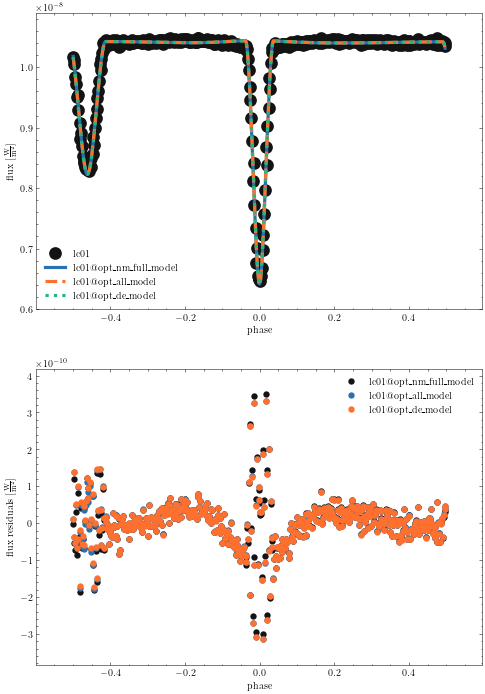

(<autofig.figure.Figure | 2 axes | 7 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [28]:
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model'], x='phase', legend=True)
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model'], x='phase', y='residuals', marker='.', legend=True, show=True)

In [29]:
for model, residuals in zip(['opt_nm_full', 'opt_nm_seq', 'opt_de'],[residuals_opt_nm_full, residuals_opt_nm_seq, residuals_opt_de]):
    print(model, np.sum(residuals**2))

opt_nm_full 1.775448538029459e-18 W2 / m4
opt_nm_seq 1.7473889368092363e-18 W2 / m4
opt_de 1.7511638545376408e-18 W2 / m4


In [30]:
b.adopt_solution('opt_de_solution')

<ParameterSet: 6 parameters | qualifiers: esinw, requivratio, teffratio, incl, requivsumfrac, ecosw>

# rv: NM

In [31]:
b.enable_dataset('rv01')
b.disable_dataset('lc01')
b.set_value_all('rv_method', context='compute', value = 'dynamical')

In [32]:
b.add_solver('optimizer.nelder_mead', solver='opt_rv_nm', maxiter=1000,
             fit_parameters=['period@binary', 'q@binary', 'asini@binary', 'vgamma@system'])
# b.run_solver('opt_rv_nm', solution='opt_rv_nm_sol', use_server='terra')

<ParameterSet: 14 parameters | qualifiers: progress_every_niters, continue_from, maxiter, adaptive, priors, compute, comments, fatol, xatol, priors_combine, expose_lnprobabilities, use_server, fit_parameters, initial_values>

In [33]:
b = phoebe.load('bundles/after_optimizers_lc_rv_dtr.bundle')

In [34]:
b.adopt_solution('opt_rv_nm_sol')
b.run_compute(model='opt_rv_nm_model', overwrite=True)
twigs = ['period@binary','q', 'asini@binary', 'vgamma']
opt_nm_rv_results = get_current_values(b, twigs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 6325.57it/s]


/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


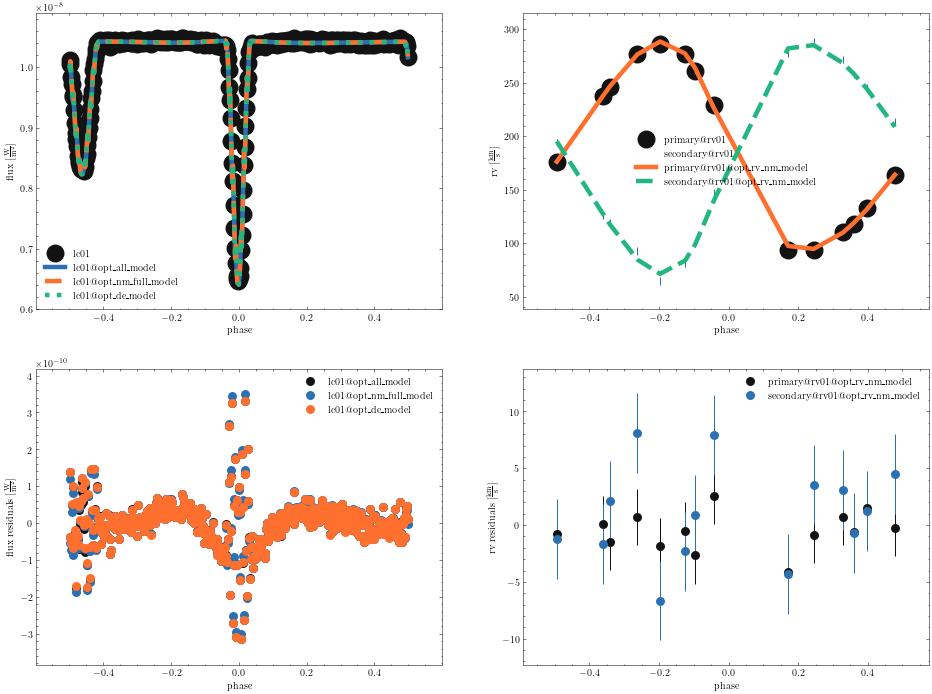

(<autofig.figure.Figure | 4 axes | 13 call(s)>,
 <Figure size 1152x864 with 4 Axes>)

In [35]:
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model', 'opt_rv_nm_model'], x='phase', legend=True)
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model', 'opt_rv_nm_model'], x='phase', y='residuals', marker='.', legend=True, show=True)

In [36]:
# b.save('bundles/after_optimizers_lc_rv_dtr.bundle')

# lcB: optimize teff, pblums

In [37]:
b = phoebe.load('bundles/after_optimizers_lc_rv_dtr.bundle')

In [38]:
lcB = np.loadtxt('data/lc.B.data.dtr')
b.add_dataset('lc', times=lcB[:,0], fluxes=lcB[:,1], sigmas=lcB[:,2], passband='Johnson:B')

<ParameterSet: 47 parameters | contexts: compute, constraint, figure, dataset>

In [39]:
b.enable_dataset('lc01')
b.enable_dataset('lc02')
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, primary, binary>

In [40]:
b.set_value('pblum_mode@lc01', 'component-coupled')
b.set_value('pblum_mode@lc02', 'dataset-coupled')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [00:20<00:00, 22.54it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


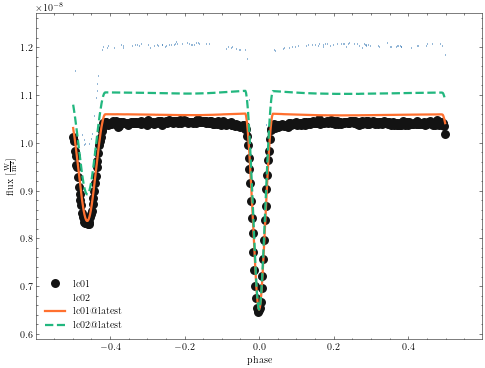

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [41]:
b['teff@primary'] = 6000
b['pblum@primary@lc01'] = 0.9e-7
b.run_compute()
b.plot(x='phase', model='latest', legend=True, show=True)

In [42]:
b.add_solver('optimizer.nelder_mead', solver='opt_teffs', fit_parameters=['teff@primary', 'teffratio', 'pblum@primary@lc01'], 
             maxiter=1000, overwrite=True)
# b.run_solver('opt_teffs', solution='opt_teffs_sol', overwrite=True, use_server='terra')

<ParameterSet: 14 parameters | qualifiers: progress_every_niters, continue_from, maxiter, adaptive, priors, compute, comments, fatol, xatol, priors_combine, expose_lnprobabilities, use_server, fit_parameters, initial_values>

In [43]:
b = phoebe.load('bundles/after_optimizers_dtr.bundle')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 472/472 [00:23<00:00, 20.06it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


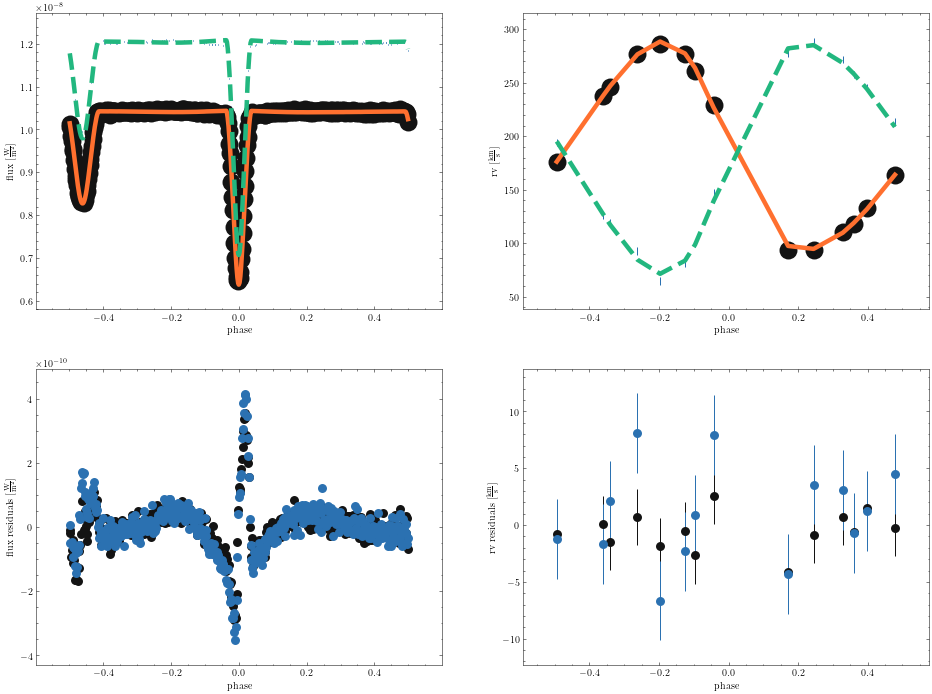

(<autofig.figure.Figure | 4 axes | 12 call(s)>,
 <Figure size 1152x864 with 4 Axes>)

In [44]:
b.adopt_solution('opt_teffs_sol')
b.enable_dataset('rv01')
b.run_compute()
b.plot(['dataset', 'model'], model='latest',  x='phase')
b.plot(['dataset', 'model'], model='latest', x='phase', y='residuals', marker='.', show=True)

In [45]:
twigs = ['teff@primary']
opt_teffs_results = get_current_values(b, twigs)

In [46]:
# b.save('bundles/after_optimizers_dtr.bundle')

# Plot results

In [48]:
truths, twigs_true, labels = get_truths_labels()
true_vals = {}
for twig, value in zip(twigs_true, truths):
    true_vals[twig] = value  

In [51]:
twigs_lcv = b.get_value('fitted_twigs@opt_de_solution')
twigs_rv = b.get_value('fitted_twigs@opt_rv_nm_sol')
twigs_teffs = b.get_value('fitted_twigs@opt_teffs_sol')
# NM: all at once
b.adopt_solution('opt_nm_full_solution')
opt_nm_full_results = get_current_values(b, twigs_lcv)
# NM: seq
b.adopt_solution('opt_all_sol')
opt_nm_seq_results = get_current_values(b, twigs_lcv)
# DE
b.adopt_solution('opt_de_solution')
opt_de_results = get_current_values(b, twigs_lcv)
# RV: NM
b.adopt_solution('opt_rv_nm_sol')
opt_nm_rv_results = get_current_values(b, twigs_rv)
# Teffs
b.adopt_solution('opt_teffs_sol')
opt_teffs_results = get_current_values(b, twigs_teffs)

model, twig, current_solution, previous_lc, previous_rv


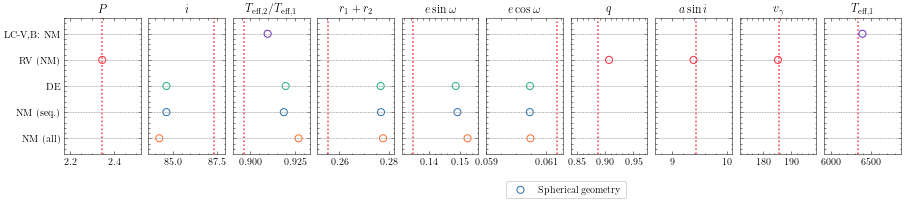

In [54]:
twigs_true = [
    'period@binary',
    'incl@binary',
     'teffratio',
     'requivsumfrac',
     'esinw',
     'ecosw',
     'q',
     'asini@binary',
     'vgamma',
    'teff@primary'
]

twigs = ['period@binary@orbit@component', 
         'incl@binary@orbit@component', 
         'teffratio@binary@orbit@component', 
         'requivsumfrac@binary@orbit@component',
         'esinw@binary@orbit@component',
         'ecosw@binary@orbit@component',
         'q@binary@orbit@component',
         'asini@binary@orbit@component',
         'vgamma@system',
         'teff@primary@star@component'
        ]

labels = [
        r'$P$',
          r'$i$', 
          r'$T_{\mathrm{eff},2}/T_{\mathrm{eff},1}$', 
          r'$r_1+r_2$', 
          r'$e\sin\omega$', 
          r'$e\cos\omega$',
          r'$q$',
          r'$a\sin i$',
          r'$v_{\gamma}$',
          r'$T_{\mathrm{eff},1}$'
         ]

fig, axes = plt.subplots(nrows = 1, ncols = len(labels), figsize=(15,2.5))
fig.subplots_adjust(hspace=0, wspace=0.1)

models = [opt_nm_full_results, opt_nm_seq_results, opt_de_results, opt_nm_rv_results, opt_teffs_results]
model_labels = [r'NM (all)', r'NM (seq.)', r'DE', r'RV (NM)', r'LC-V,B: NM']
colors = [phoebe_c['orange'], phoebe_c['blue'], phoebe_c['green'], phoebe_c['red'], phoebe_c['purple']]
markers = ['o', 'o', 'o', 'o', 'o']
# import cmasher as cmr
# colors = cmr.take_cmap_colors('cmr.rainforest', len(models), cmap_range=(0.05, 0.85), return_fmt='hex')
print('model, twig, current_solution, previous_lc, previous_rv')
for ax, label, twig, twig_true in zip(axes, labels, twigs, twigs_true):
    ax.set_title(label)
    # ax.set_ylabel(ylabel)
    # ax.set_yticks([])
    ax.margins(0.25)
    for i, model in enumerate(models):
        ax.axhline(i, linestyle='--', lw=0.5, color='gray')
        if twig in model.keys():
            # print(model_labels[i], twig, model[twig], b_prev_lc.get_value(twig), b_prev_rv.get_value(twig))
            if markers[i] == 'o':
                fc = 'none'
            else:
                fc = colors[i]
            if model_labels[i] == r'NM (seq.)' and label==r'$i$':
                ax.scatter(model[twig], i, ec=colors[i], fc=fc, s=50, marker=markers[i], zorder=1, label='Spherical geometry')
            elif model_labels[i] == r'NM (Roche)' and label==r'$i$':
                ax.scatter(model[twig], i, ec=colors[i], fc=fc, s=50, marker=markers[i], zorder=1, label='Roche geometry')
            else:
                ax.scatter(model[twig], i, ec=colors[i], fc=fc, s=50, marker=markers[i], zorder=1)
                
            # ax.scatter(b_prev_lc.get_value(twig), i, marker='o', fc='gray', ec='none')
            # ax.scatter(b_prev_rv.get_value(twig), i, marker='o', fc='none', ec='gray')
        else:
            pass
    ax.axvline(x=true_vals[twig_true], ls=':', lw=1.5, c=phoebe_c['red'], zorder=0)
    ax.set_ylim(-0.6, len(models)-1+0.6)
        
for i,ax in enumerate(axes):
    # ax.grid(visible=True, which='major', axis='y', linestyle='--')
    if i in [1,2,3,4,5]:
        ax.margins(0.2, 0.1)
        
    if i==0:
        ax.set_yticks(np.arange(0,len(model_labels),1),model_labels)
    else:
        ax.yaxis.set_ticklabels([])
        
    if i==5:
        ax.set_xticks([0.059, 0.061])
# fig.tight_layout()
fig.legend(bbox_to_anchor=(0.65,0.), ncol=2, fancybox=True, frameon=True)
# fig.savefig('figs/6_optimizers_vals.pdf', dpi=300)

# Reoptimize all LC parameters with Roche geometry

In [55]:
b = phoebe.load('bundles/after_optimizers_dtr.bundle')

In [56]:
b.set_value_all('distortion_method', 'roche')

In [57]:
b.enable_dataset('lc01')
b.enable_dataset('lc02')
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, primary, binary>

In [58]:
b.add_distribution('incl@binary', phoebe.uniform(83, 88), distribution='de_bounds2')
b.add_distribution('teffratio', phoebe.uniform(0.8, 1.0), distribution='de_bounds2')
b.add_distribution('requivratio', phoebe.uniform(0.5,1.0), distribution='de_bounds2')
b.add_distribution('requivsumfrac', phoebe.uniform(0.2,0.3), distribution='de_bounds2')
b.add_distribution('esinw', phoebe.uniform(0.1,0.15), distribution='de_bounds2')
b.add_distribution('ecosw', phoebe.uniform(0.03,0.08), distribution='de_bounds2')
b.add_distribution('teff@primary', phoebe.uniform(6300, 6500), distribution='de_bounds2')
b.add_distribution('pblum@primary@lc01', phoebe.uniform(7e-8, 1.2e-7), distribution='de_bounds2')

<ParameterSet: 1 parameters>

In [59]:
b.add_solver('optimizer.differential_evolution', 
             solver='opt_de_roche', bounds=['de_bounds2',],
             fit_parameters = ['incl@binary', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw', 'teffratio', 
                               'teff@primary', 'pblum@primary@lc01'],
             compute='phoebe01', overwrite=True)

<ParameterSet: 15 parameters | qualifiers: polish, popsize, maxiter, tol, bounds, compute, comments, bounds_sigma, bounds_combine, strategy, expose_lnprobabilities, use_server, atol, recombination, fit_parameters>

In [60]:
b.set_value('maxiter', solver='opt_de_roche', value=1000)
b.set_value('popsize', solver='opt_de_roche', value=30)
b.set_value('polish', solver='opt_de_roche', value=True)
# b.run_solver('opt_de_roche', solution='opt_de_roche_sol', use_server='terra', detach=True)

In [61]:
b.add_solver('optimizer.nelder_mead', 
             solver='opt_nm_roche', priors=['de_bounds2',],
             fit_parameters = ['incl@binary', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw', 'teffratio', 
                              'teff@primary', 'pblum@primary@lc01'],
             compute='phoebe01', 
             maxiter=1000,
             overwrite=True)

<ParameterSet: 14 parameters | qualifiers: progress_every_niters, continue_from, maxiter, adaptive, priors, compute, comments, fatol, xatol, priors_combine, expose_lnprobabilities, use_server, fit_parameters, initial_values>

In [62]:
# b.run_solver('opt_nm_roche', solution='opt_nm_roche_sol', use_server='terra', detach=True)

In [63]:
b = phoebe.load('bundles/after_optimizers_roche_dtr.bundle')

In [ ]:
twigs_roche = b.get_value('fitted_twigs@opt_nm_roche_sol')

In [68]:
b.adopt_solution('opt_nm_roche_sol')
opt_roche_nm_results = get_current_values(b, twigs_roche)
# b.run_compute(use_server='terra', model='after_roche_opt_nm2', overwrite=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.07.05-16.57.03/*"
# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.07.05-16.57.03/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.07.05-16.57.03"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_vBLzeynjjYypFsfeSPpSOyvUbcZbTC.py terra:/home/users/angela/crimpl/crimpl-job-2022.07.05-16.57.03/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_vBLzeynjjYypFsfeSPpSOyvUbcZbTC.py' >> /home/us

In [69]:
b.adopt_solution('opt_de_roche_sol')
opt_roche_de_results = get_current_values(b, twigs_roche)
# b.run_compute(use_server='terra', model='after_roche_opt_de2', overwrite=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.07.05-16.59.10/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.07.05-16.59.10/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.07.05-16.59.10"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_EKhCrBJewhtnfCZZTADCLlSQszXnBF.py terra:/home/users/angela/crimpl/crimpl-job-2022.07.05-16.59.10/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_EKhCrBJewhtnfCZZTADCLlSQszXnBF.py' >> /home/users/angela/crimpl/crimpl-job-2022.07.05-16.59.10/crimpl-input-files.list"
# crimpl: 

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


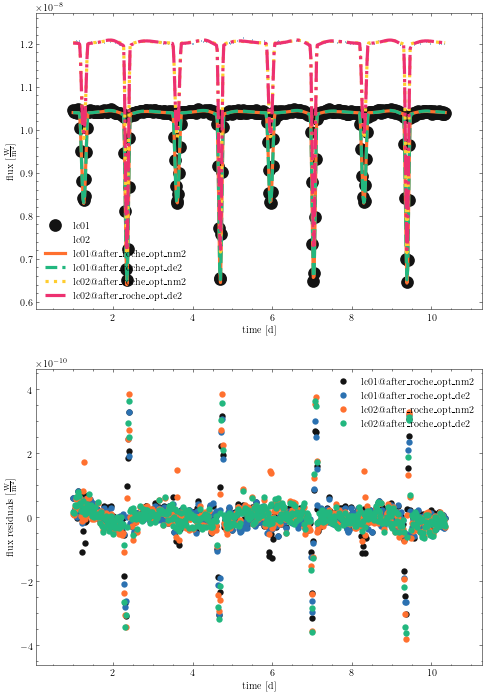

(<autofig.figure.Figure | 2 axes | 10 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [70]:
b.plot(['dataset', 'model'], model=['after_roche_opt_nm2',
                                    'after_roche_opt_de2'
                                   ],  x='times', legend=True)
b.plot(['dataset', 'model'], model=['after_roche_opt_nm2', 
                                    'after_roche_opt_de2'
                                   ], x='times', y='residuals', marker='.', legend=True, show=True)

model, twig, current_solution, previous_lc, previous_rv


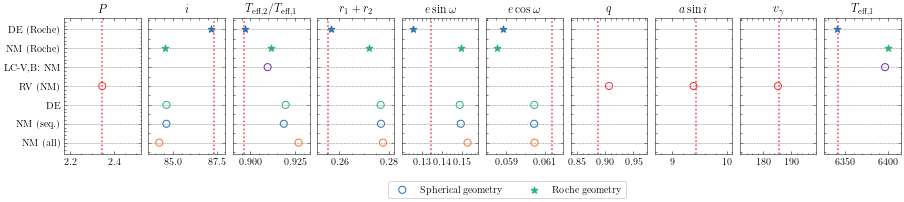

In [71]:
twigs_true = [
    'period@binary',
    'incl@binary',
     'teffratio',
     'requivsumfrac',
     'esinw',
     'ecosw',
     'q',
     'asini@binary',
     'vgamma',
    'teff@primary'
]

twigs = ['period@binary@orbit@component', 
         'incl@binary@orbit@component', 
         'teffratio@binary@orbit@component', 
         'requivsumfrac@binary@orbit@component',
         'esinw@binary@orbit@component',
         'ecosw@binary@orbit@component',
         'q@binary@orbit@component',
         'asini@binary@orbit@component',
         'vgamma@system',
         'teff@primary@star@component'
        ]

labels = [
        r'$P$',
          r'$i$', 
          r'$T_{\mathrm{eff},2}/T_{\mathrm{eff},1}$', 
          r'$r_1+r_2$', 
          r'$e\sin\omega$', 
          r'$e\cos\omega$',
          r'$q$',
          r'$a\sin i$',
          r'$v_{\gamma}$',
          r'$T_{\mathrm{eff},1}$'
         ]

fig, axes = plt.subplots(nrows = 1, ncols = len(labels), figsize=(15,2.5))
fig.subplots_adjust(hspace=0, wspace=0.1)

models = [opt_nm_full_results, opt_nm_seq_results, opt_de_results, opt_nm_rv_results, opt_teffs_results, opt_roche_nm_results, opt_roche_de_results]
model_labels = [r'NM (all)', r'NM (seq.)', r'DE', r'RV (NM)', r'LC-V,B: NM', r'NM (Roche)', r'DE (Roche)']
colors = [phoebe_c['orange'], phoebe_c['blue'], phoebe_c['green'], phoebe_c['red'], phoebe_c['purple'], phoebe_c['green'], phoebe_c['blue']]
markers = ['o', 'o', 'o', 'o', 'o', '*', '*']
# import cmasher as cmr
# colors = cmr.take_cmap_colors('cmr.rainforest', len(models), cmap_range=(0.05, 0.85), return_fmt='hex')
print('model, twig, current_solution, previous_lc, previous_rv')
for ax, label, twig, twig_true in zip(axes, labels, twigs, twigs_true):
    ax.set_title(label)
    # ax.set_ylabel(ylabel)
    # ax.set_yticks([])
    ax.margins(0.25)
    for i, model in enumerate(models):
        ax.axhline(i, linestyle='--', lw=0.5, color='gray')
        if twig in model.keys():
            # print(model_labels[i], twig, model[twig], b_prev_lc.get_value(twig), b_prev_rv.get_value(twig))
            if markers[i] == 'o':
                fc = 'none'
            else:
                fc = colors[i]
            if model_labels[i] == r'NM (seq.)' and label==r'$i$':
                ax.scatter(model[twig], i, ec=colors[i], fc=fc, s=50, marker=markers[i], zorder=1, label='Spherical geometry')
            elif model_labels[i] == r'NM (Roche)' and label==r'$i$':
                ax.scatter(model[twig], i, ec=colors[i], fc=fc, s=50, marker=markers[i], zorder=1, label='Roche geometry')
            else:
                ax.scatter(model[twig], i, ec=colors[i], fc=fc, s=50, marker=markers[i], zorder=1)
                
            # ax.scatter(b_prev_lc.get_value(twig), i, marker='o', fc='gray', ec='none')
            # ax.scatter(b_prev_rv.get_value(twig), i, marker='o', fc='none', ec='gray')
        else:
            pass
    ax.axvline(x=true_vals[twig_true], ls=':', lw=1.5, c=phoebe_c['red'], zorder=0)
    ax.set_ylim(-0.6, len(models)-1+0.6)
        
for i,ax in enumerate(axes):
    # ax.grid(visible=True, which='major', axis='y', linestyle='--')
    if i in [1,2,3,4,5]:
        ax.margins(0.2, 0.1)
        
    if i==0:
        ax.set_yticks(np.arange(0,len(model_labels),1),model_labels)
    else:
        ax.yaxis.set_ticklabels([])
        
    if i==5:
        ax.set_xticks([0.059, 0.061])
# fig.tight_layout()
fig.legend(bbox_to_anchor=(0.65,0.), ncol=2, fancybox=True, frameon=True)
# fig.savefig('figs/6_optimizers_vals.pdf', dpi=300)